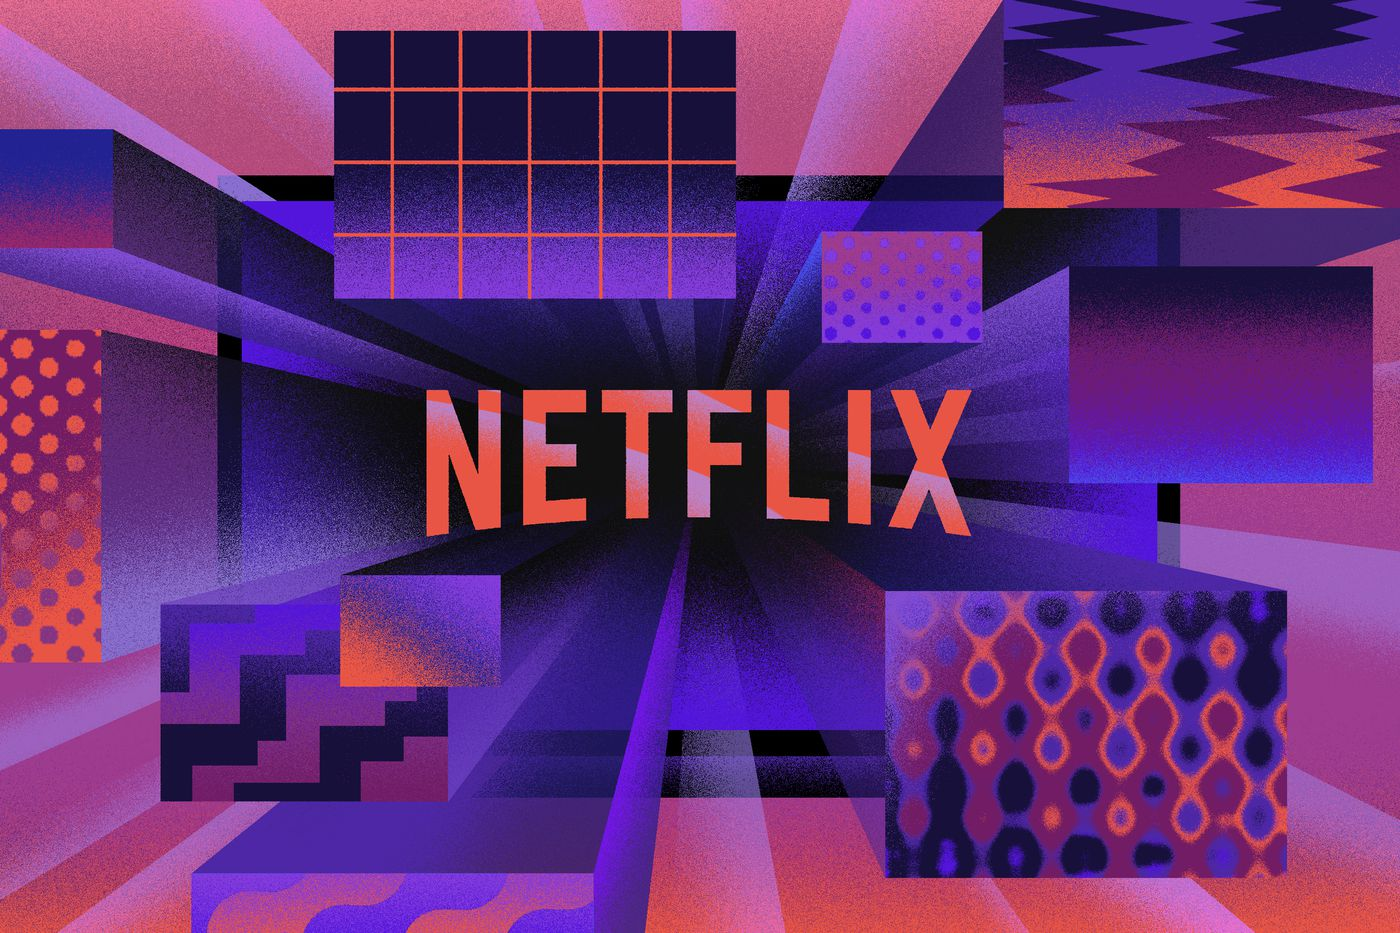

# Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.


# Given the large number of movies and series available on the platform, it is a perfect opportunity to build data manipulation skills and dive into the entertainment industry. My friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.


# As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.


# If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. But first we'll need to create a DataFrame from scratch. 

## LOADING YOUR FRIEND'S DATA INTO A DICTIONARY

In [4]:
# Creating the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Creating a dictionary with the two lists
movie_dict = {"years":years, "durations":durations}

# Printing the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## CREATING A DATAFRAME FROM A DICTIONARY

In [11]:
# Importing pandas under its usual alias
import pandas as pd

# Creating a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Printing the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


## VISUALLY INSPECTING OUR DATA

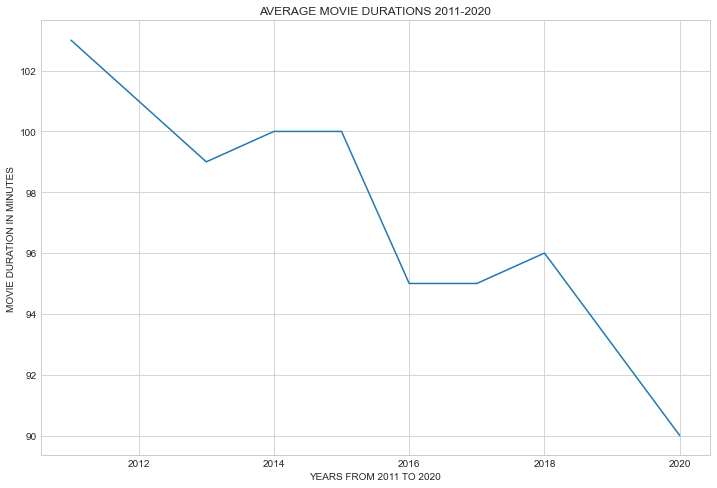

In [46]:
# Importing matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# Drawing a line plot of release_years and durations
plt.plot(years, durations)

# Creating a title and axes
plt.title("AVERAGE MOVIE DURATIONS 2011-2020")
plt.xlabel('YEARS FROM 2011 TO 2020')
plt.ylabel('MOVIE DURATION IN MINUTES')
# Showing the plot
plt.show()

## LOADING THE REST OF THE DATA FROM A CSV FILE

In [29]:
# Reading in the CSV as a DataFrame
netflix_df = pd.read_csv("E:\Desktop\DataCamp\PROJECT_INVESTIGATING NETFLIX DATA/netflix_titles.csv")

# Printing the first five rows of the DataFrame
print(netflix_df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  Unnamed: 10  \
0  25-Sep-21          2020  PG-13      90.0          NaN   
1  24-Sep-21          2021  TV-MA       2.0          NaN   
2  24-Sep-21        

## FILTERING FOR MOVIES

In [30]:
# Subseting the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"]== "Movie"]

# Selecting only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Printing the first five rows of the new DataFrame
print(netflix_movies_col_subset.head(5))

                               title  \
0               Dick Johnson Is Dead   
6   My Little Pony: A New Generation   
7                            Sankofa   
9                       The Starling   
12                      Je Suis Karl   

                                              country  \
0                                       United States   
6                                                 NaN   
7   United States, Ghana, Burkina Faso, United Kin...   
9                                       United States   
12                            Germany, Czech Republic   

                       genre  release_year  duration  
0              Documentaries          2020      90.0  
6   Children & Family Movies          2021      91.0  
7                     Dramas          1993     125.0  
9                   Comedies          2021     104.0  
12                    Dramas          2021     127.0  


## CREATING A SCATTER PLOT

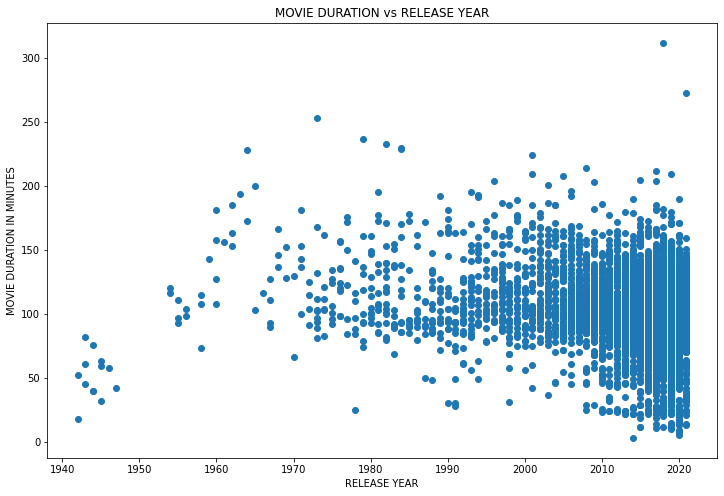

In [23]:
# Creating a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Creating a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Creating a title
plt.title("MOVIE DURATION vs RELEASE YEAR")
plt.xlabel('RELEASE YEAR')
plt.ylabel('MOVIE DURATION IN MINUTES')
# Showing the plot
plt.show()

## DIGGING DEEPER

In [31]:
# Filtering for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] < 60]

# Printing the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title               country  \
45                              My Heroes Were Cowboys                   NaN   
71                         A StoryBots Space Adventure                   NaN   
77                       Little Singham - Black Shadow                   NaN   
279               Monster Hunter: Legends of the Guild  United States, Japan   
470                        Bridgerton - The Afterparty                   NaN   
484                       Lee Su-geun: The Sense Coach                   NaN   
495                                          Awon Boyz                   NaN   
560                                            Audible                   NaN   
694                                              Aziza        Lebanon, Syria   
695                                     Besieged Bread                   NaN   
729                      Bling Empire - The Afterparty                   NaN   
730                         Cobra Kai - 

## MARKING NON-FEATURE FILMS

### If the genre is "Children & Family Movies", adding color "orange".
### If the genre is "Documentaries", adding color "lime".
### If the genre is "Stand-Up Comedy", adding color "blue".
### If the genre is any other genre, adding color "black"

In [40]:
# Defining an empty list
colors = []

# Iterating over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Children & Family Movies" :
        colors.append("orange")
    elif row["genre"] == "Documentaries" :
        colors.append("lime")
    elif row["genre"] == "Stand-Up Comedy" :
        colors.append("blue")
    else:
        colors.append("black")
        
# Inspecting the first 10 values in your list        
print(colors[:10])

['lime', 'orange', 'black', 'black', 'black', 'orange', 'lime', 'black', 'black', 'orange']


## PLOTTING WITH DIFFERENT COLORS

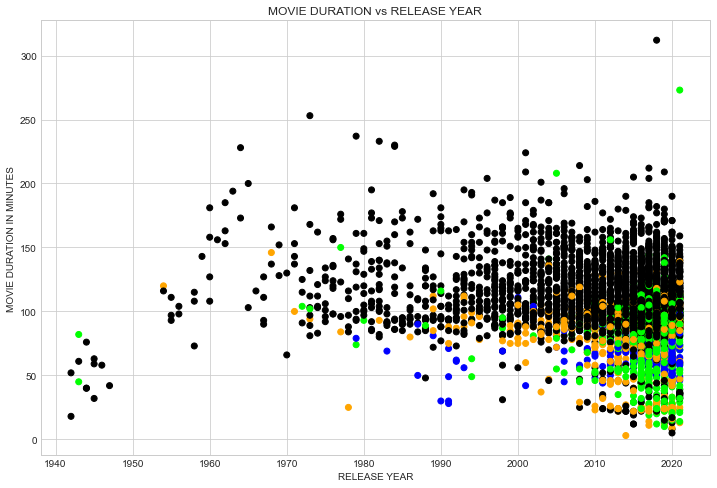

In [41]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12,8))

# Creating a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], color = colors)

# Creating a title and axis labels
plt.title("MOVIE DURATION vs RELEASE YEAR")
plt.xlabel('RELEASE YEAR')
plt.ylabel('MOVIE DURATION IN MINUTES')
# Show the plot
plt.show()

## ARE WE CERTAIN THAT MOVIES ARE GETTING SHORTER?

In [45]:
MOVIES_ARE_GETTING_SHORTER = "NO!"
MOVIES_ARE_GETTING_SHORTER

'NO!'